## Keras - Overfitting and Underfitting

#### Preparation

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

print(tf.__version__)

1.11.0


In [2]:
NUM_WORDS = 2500

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

In [3]:
def multi_hot_sequences(sequences, dimension):
    
    # Multi-hot encoding:
    # Instead of [[0, 0, 1, 0, 0],
    #             [0, 0, 0, 0, 1]]
    # We combine them to [0, 0, 1, 0, 1]
    
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

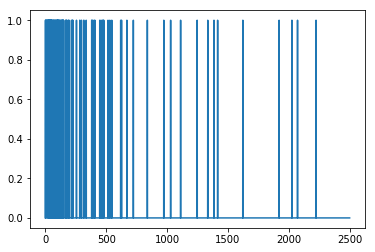

In [4]:
plt.plot(train_data[0])

#### Overfitting

The simplest way to prevent overfitting is to reduce the size of the model, i.e. the number of learnable parameters in the model (which is determined by the number of layers and hte number of units per layer). This is called the model's *capacity*.

To find an appropriate model size, it's best to start with relatively few layers and parameters, then begin incresing the size of the layers or adding new layers until you see diminishing returns on the validation loss.

In [5]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                40016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 40,305
Trainable params: 40,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 2s - loss: 0.4980 - acc: 0.7652 - binary_crossentropy: 0.4980 - val_loss: 0.3454 - val_acc: 0.8617 - val_binary_crossentropy: 0.3454
Epoch 2/20
 - 1s - loss: 0.2928 - acc: 0.8855 - binary_crossentropy: 0.2928 - val_loss: 0.2999 - val_acc: 0.8760 - val_binary_crossentropy: 0.2999
Epoch 3/20
 - 1s - loss: 0.2514 - acc: 0.9013 - binary_crossentropy: 0.2514 - val_loss: 0.2990 - val_acc: 0.8753 - val_binary_crossentropy: 0.2990
Epoch 4/20
 - 1s - loss: 0.2329 - acc: 0.9100 - binary_crossentropy: 0.2329 - val_loss: 0.3048 - val_acc: 0.8737 - val_binary_crossentropy: 0.3048
Epoch 5/20
 - 1s - loss: 0.2200 - acc: 0.9155 - binary_crossentropy: 0.2200 - val_loss: 0.3133 - val_acc: 0.8724 - val_binary_crossentropy: 0.3133
Epoch 6/20
 - 1s - loss: 0.2082 - acc: 0.9206 - binary_crossentropy: 0.2082 - val_loss: 0.3209 - val_acc: 0.8699 - val_binary_crossentropy: 0.3209
Epoch 7/20
 - 1s - loss: 0.1964 - acc: 0.9254 - binary_crossentropy:

#### Compare with a smaller model

In [7]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 10004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 10,029
Trainable params: 10,029
Non-trainable params: 0
_________________________________________________________________


In [8]:
smaller_history = smaller_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 2s - loss: 0.5670 - acc: 0.7442 - binary_crossentropy: 0.5670 - val_loss: 0.4559 - val_acc: 0.8306 - val_binary_crossentropy: 0.4559
Epoch 2/20
 - 1s - loss: 0.3824 - acc: 0.8599 - binary_crossentropy: 0.3824 - val_loss: 0.3562 - val_acc: 0.8623 - val_binary_crossentropy: 0.3562
Epoch 3/20
 - 1s - loss: 0.3089 - acc: 0.8812 - binary_crossentropy: 0.3089 - val_loss: 0.3157 - val_acc: 0.8744 - val_binary_crossentropy: 0.3157
Epoch 4/20
 - 1s - loss: 0.2743 - acc: 0.8938 - binary_crossentropy: 0.2743 - val_loss: 0.3012 - val_acc: 0.8773 - val_binary_crossentropy: 0.3012
Epoch 5/20
 - 1s - loss: 0.2551 - acc: 0.9005 - binary_crossentropy: 0.2551 - val_loss: 0.2966 - val_acc: 0.8776 - val_binary_crossentropy: 0.2966
Epoch 6/20
 - 1s - loss: 0.2428 - acc: 0.9058 - binary_crossentropy: 0.2428 - val_loss: 0.2960 - val_acc: 0.8778 - val_binary_crossentropy: 0.2960
Epoch 7/20
 - 1s - loss: 0.2345 - acc: 0.9090 - binary_crossentropy:

#### Compare with an overfitting model

In [9]:
bigger_model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               640256    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 706,305
Trainable params: 706,305
Non-trainable params: 0
_________________________________________________________________


In [10]:
bigger_history = bigger_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.3919 - acc: 0.8246 - binary_crossentropy: 0.3919 - val_loss: 0.2967 - val_acc: 0.8749 - val_binary_crossentropy: 0.2967
Epoch 2/20
 - 3s - loss: 0.2388 - acc: 0.9056 - binary_crossentropy: 0.2388 - val_loss: 0.3085 - val_acc: 0.8704 - val_binary_crossentropy: 0.3085
Epoch 3/20
 - 3s - loss: 0.1772 - acc: 0.9325 - binary_crossentropy: 0.1772 - val_loss: 0.3184 - val_acc: 0.8688 - val_binary_crossentropy: 0.3184
Epoch 4/20
 - 3s - loss: 0.0826 - acc: 0.9772 - binary_crossentropy: 0.0826 - val_loss: 0.3967 - val_acc: 0.8624 - val_binary_crossentropy: 0.3967
Epoch 5/20
 - 3s - loss: 0.0201 - acc: 0.9971 - binary_crossentropy: 0.0201 - val_loss: 0.4730 - val_acc: 0.8633 - val_binary_crossentropy: 0.4730
Epoch 6/20
 - 3s - loss: 0.0042 - acc: 0.9998 - binary_crossentropy: 0.0042 - val_loss: 0.5503 - val_acc: 0.8648 - val_binary_crossentropy: 0.5503
Epoch 7/20
 - 3s - loss: 0.0018 - acc: 0.9999 - binary_crossentropy:

#### Plot the training and validation loss

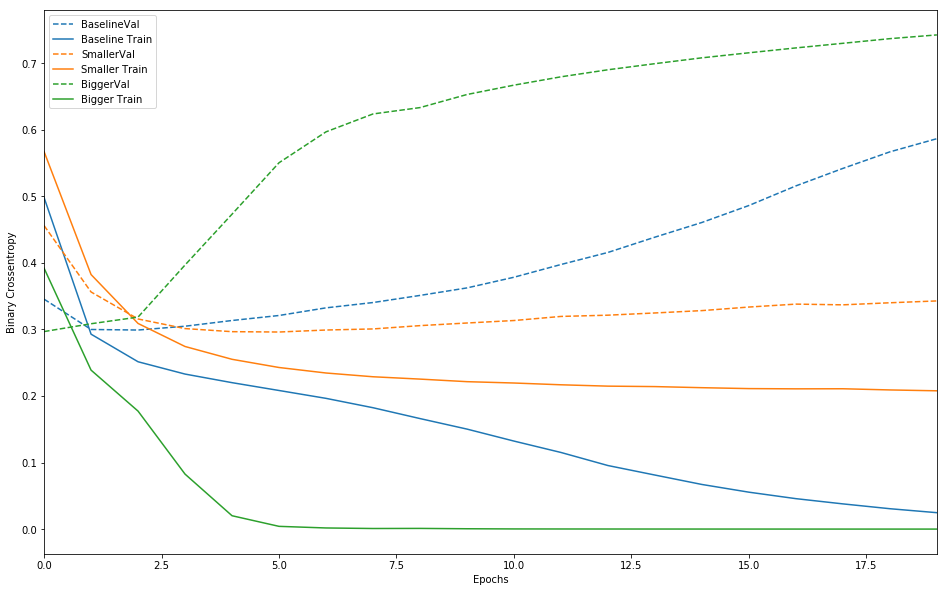

In [11]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16, 10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key], '--', label=name.title()+'Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title()+' Train')
        
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    
    plt.xlim([0, max(history.epoch)])
    
plot_history([('baseline', baseline_history), ('smaller', smaller_history), ('bigger', bigger_history)])

#### Strategy: Add weight regularization

In [13]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 2s - loss: 0.5888 - acc: 0.7534 - binary_crossentropy: 0.5481 - val_loss: 0.4313 - val_acc: 0.8536 - val_binary_crossentropy: 0.3926
Epoch 2/20
 - 2s - loss: 0.3635 - acc: 0.8763 - binary_crossentropy: 0.3229 - val_loss: 0.3472 - val_acc: 0.8768 - val_binary_crossentropy: 0.3054
Epoch 3/20
 - 1s - loss: 0.3116 - acc: 0.8953 - binary_crossentropy: 0.2694 - val_loss: 0.3362 - val_acc: 0.8800 - val_binary_crossentropy: 0.2937
Epoch 4/20
 - 1s - loss: 0.2917 - acc: 0.9043 - binary_crossentropy: 0.2490 - val_loss: 0.3365 - val_acc: 0.8774 - val_binary_crossentropy: 0.2940
Epoch 5/20
 - 1s - loss: 0.2832 - acc: 0.9060 - binary_crossentropy: 0.2409 - val_loss: 0.3410 - val_acc: 0.8749 - val_binary_crossentropy: 0.2991
Epoch 6/20
 - 1s - loss: 0.2775 - acc: 0.9074 - binary_crossentropy: 0.2358 - val_loss: 0.3428 - val_acc: 0.8736 - val_binary_crossentropy: 0.3016
Epoch 7/20
 - 1s - loss: 0.2737 - acc: 0.9087 - binary_crossentropy:

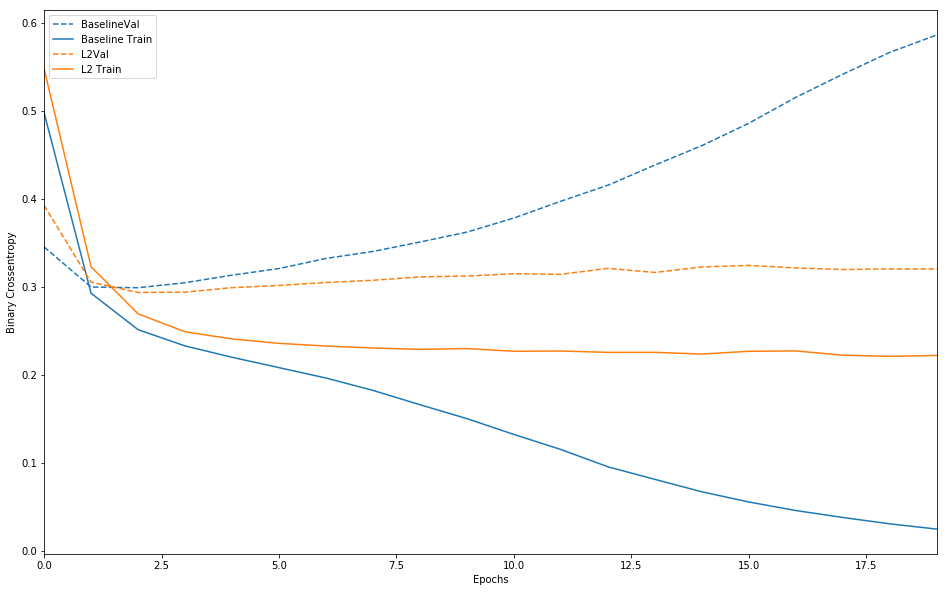

In [14]:
plot_history([('baseline', baseline_history), ('l2', l2_model_history)]) # L2 more resistant to overfitting than baseline

#### Strategy: Add dropout
    
**Dropout**, applied to a layer, consists of randomly "dropping out" (set to zero) a number of output features of the layers during training.

In [15]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 2s - loss: 0.6715 - acc: 0.5599 - binary_crossentropy: 0.6715 - val_loss: 0.6038 - val_acc: 0.7937 - val_binary_crossentropy: 0.6038
Epoch 2/20
 - 1s - loss: 0.5714 - acc: 0.6907 - binary_crossentropy: 0.5714 - val_loss: 0.4619 - val_acc: 0.8465 - val_binary_crossentropy: 0.4619
Epoch 3/20
 - 1s - loss: 0.4786 - acc: 0.7768 - binary_crossentropy: 0.4786 - val_loss: 0.3600 - val_acc: 0.8670 - val_binary_crossentropy: 0.3600
Epoch 4/20
 - 1s - loss: 0.4111 - acc: 0.8230 - binary_crossentropy: 0.4111 - val_loss: 0.3190 - val_acc: 0.8748 - val_binary_crossentropy: 0.3190
Epoch 5/20
 - 1s - loss: 0.3691 - acc: 0.8511 - binary_crossentropy: 0.3691 - val_loss: 0.2978 - val_acc: 0.8778 - val_binary_crossentropy: 0.2978
Epoch 6/20
 - 1s - loss: 0.3412 - acc: 0.8657 - binary_crossentropy: 0.3412 - val_loss: 0.2911 - val_acc: 0.8769 - val_binary_crossentropy: 0.2911
Epoch 7/20
 - 1s - loss: 0.3218 - acc: 0.8776 - binary_crossentropy:

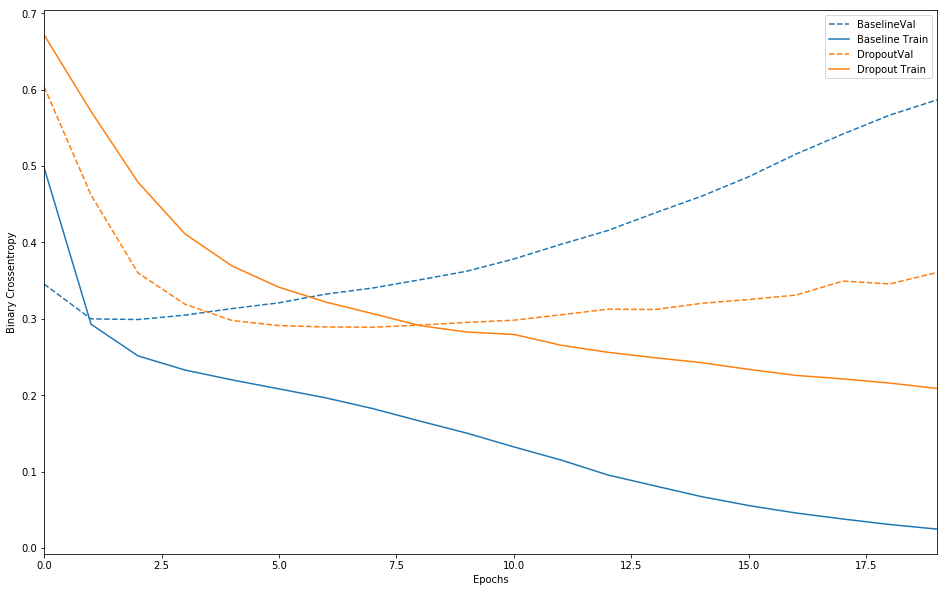

In [16]:
plot_history([('baseline', baseline_history), ('dropout', dpt_model_history)]) # improvements as well